#CLUSTERING ANALYSIS

#EDA

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


array([[<Axes: title={'center': 'ID#'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>],
       [<Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>],
       [<Axes: title={'center': 'Bonus_miles'}>,
        <Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>],
       [<Axes: title={'center': 'Flight_trans_12'}>,
        <Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award?'}>]], dtype=object)

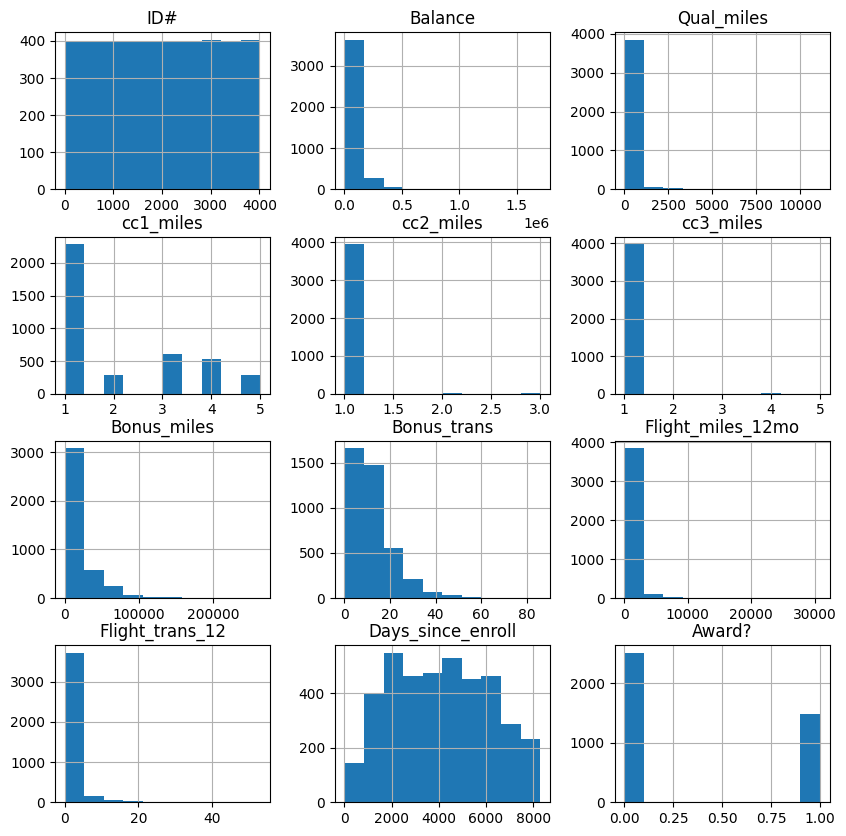

In [ ]:
#histograms
df.hist(figsize=(10,10))

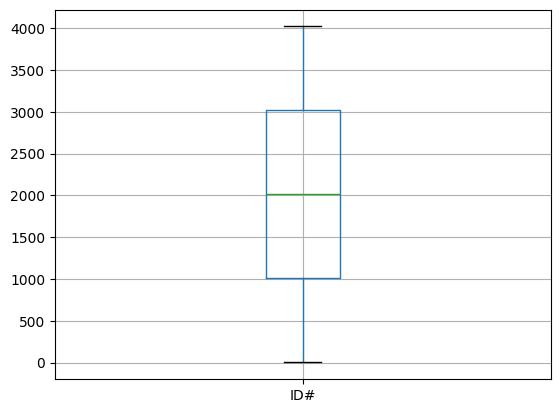

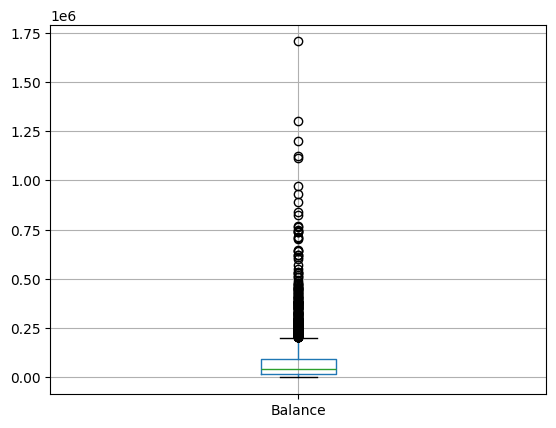

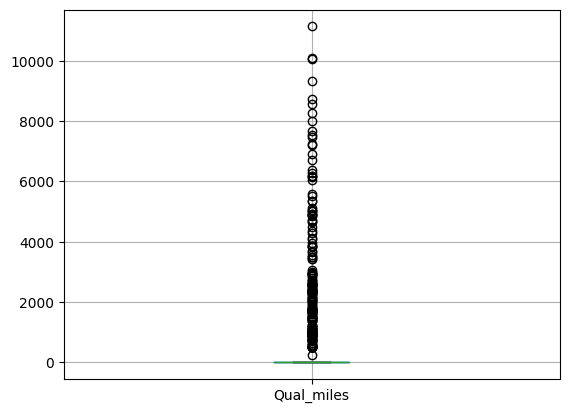

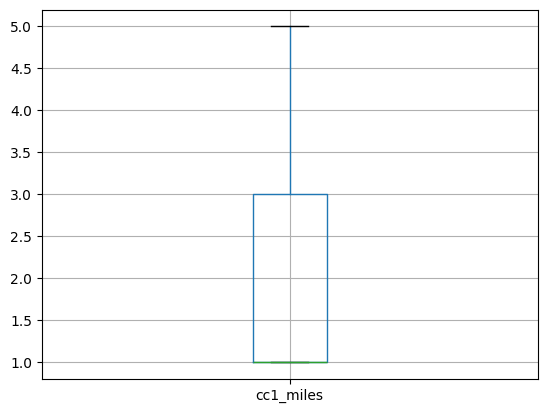

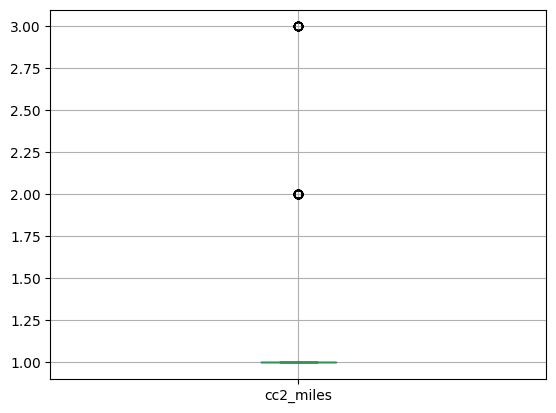

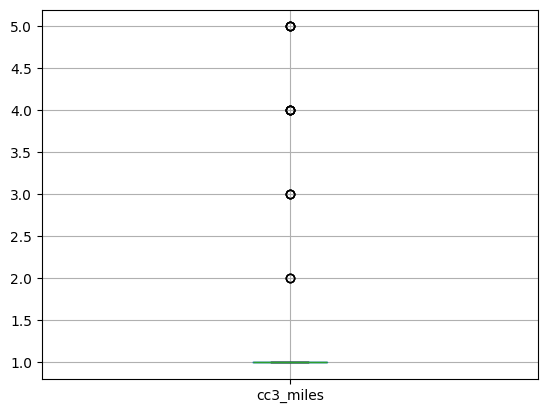

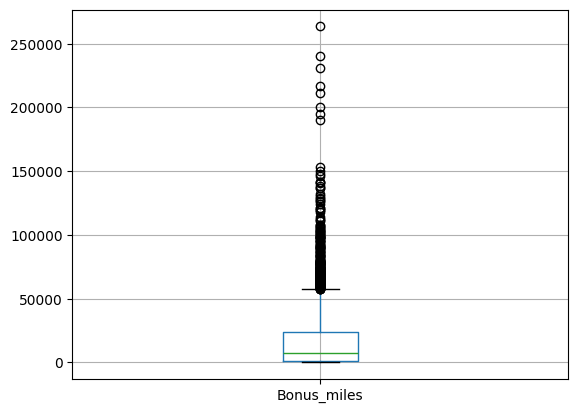

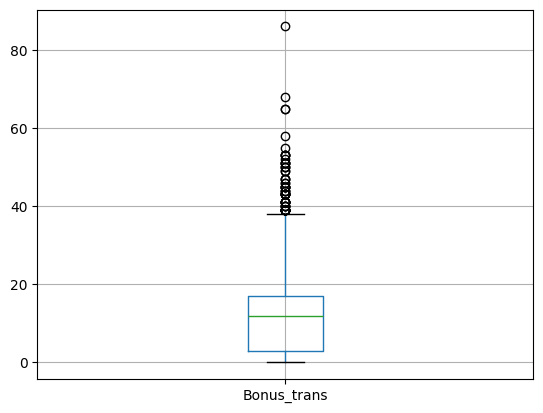

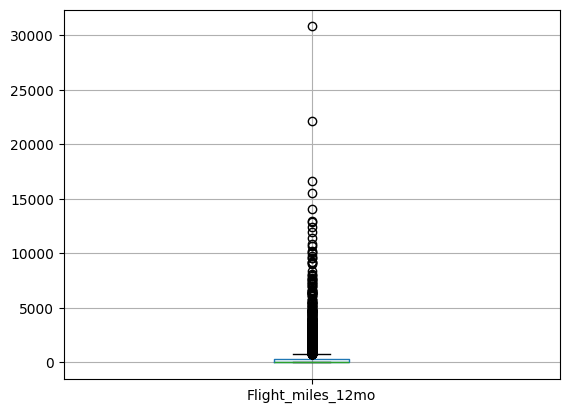

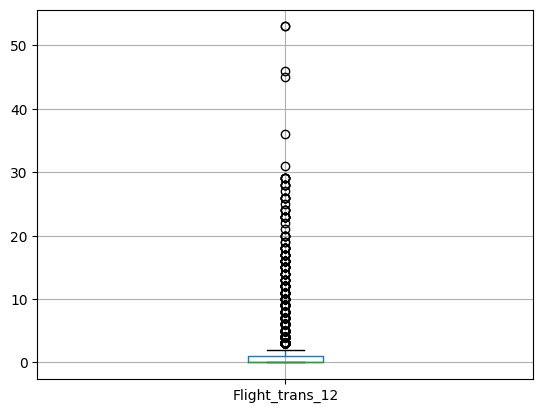

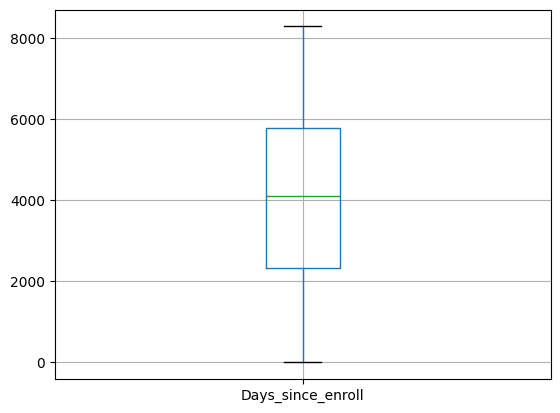

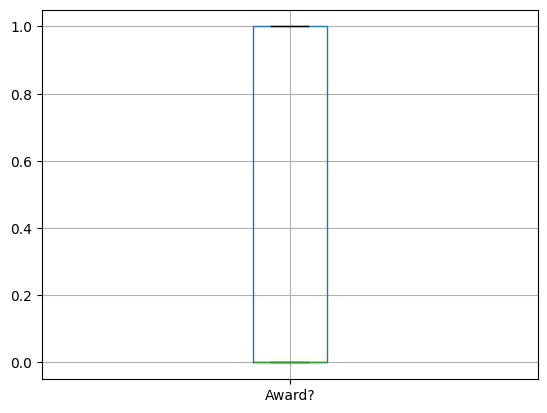

In [ ]:
#box plots
import matplotlib.pyplot as plt
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
for i in numerical_columns:
  plt.figure()
  df.boxplot([i])

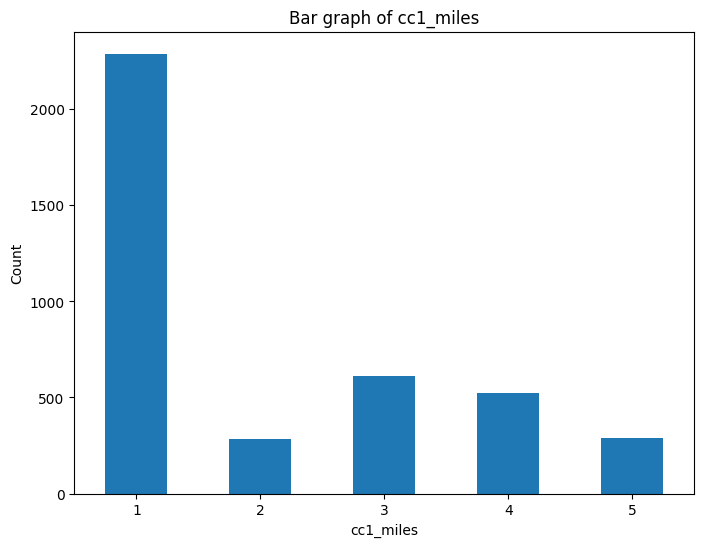

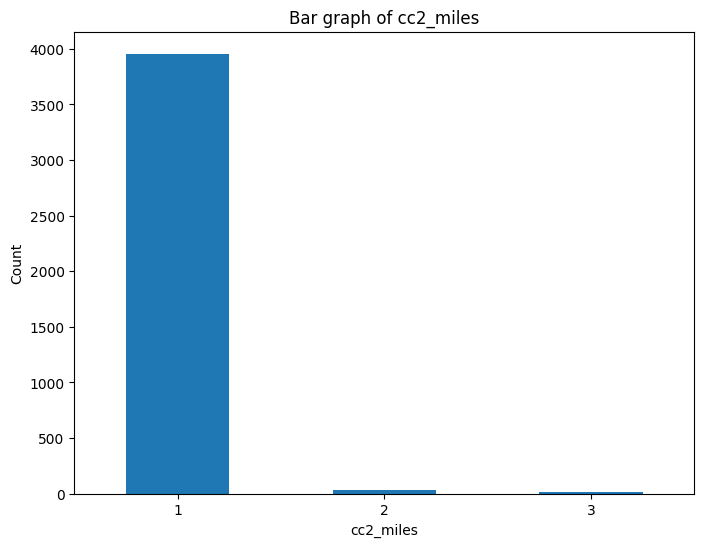

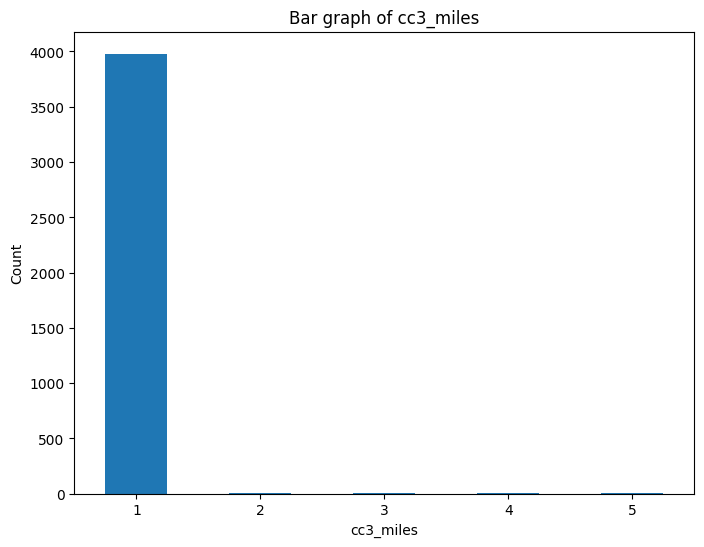

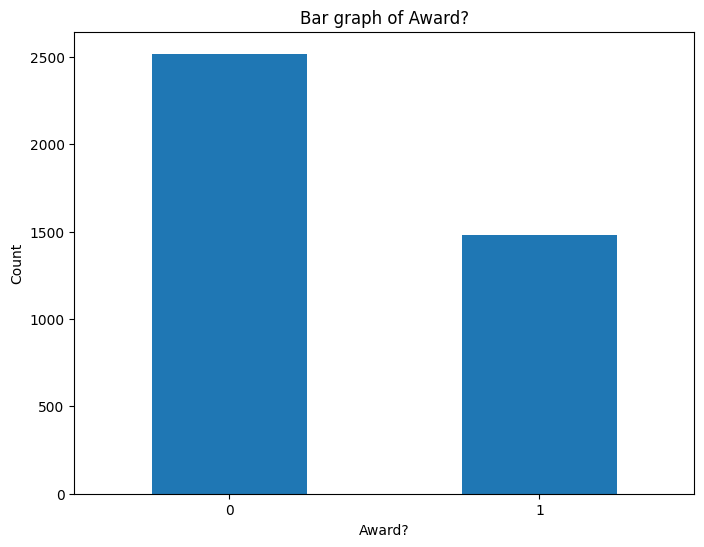

In [ ]:
# Generate bar graphs for categorical columns
categorical_columns = ['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Bar graph of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

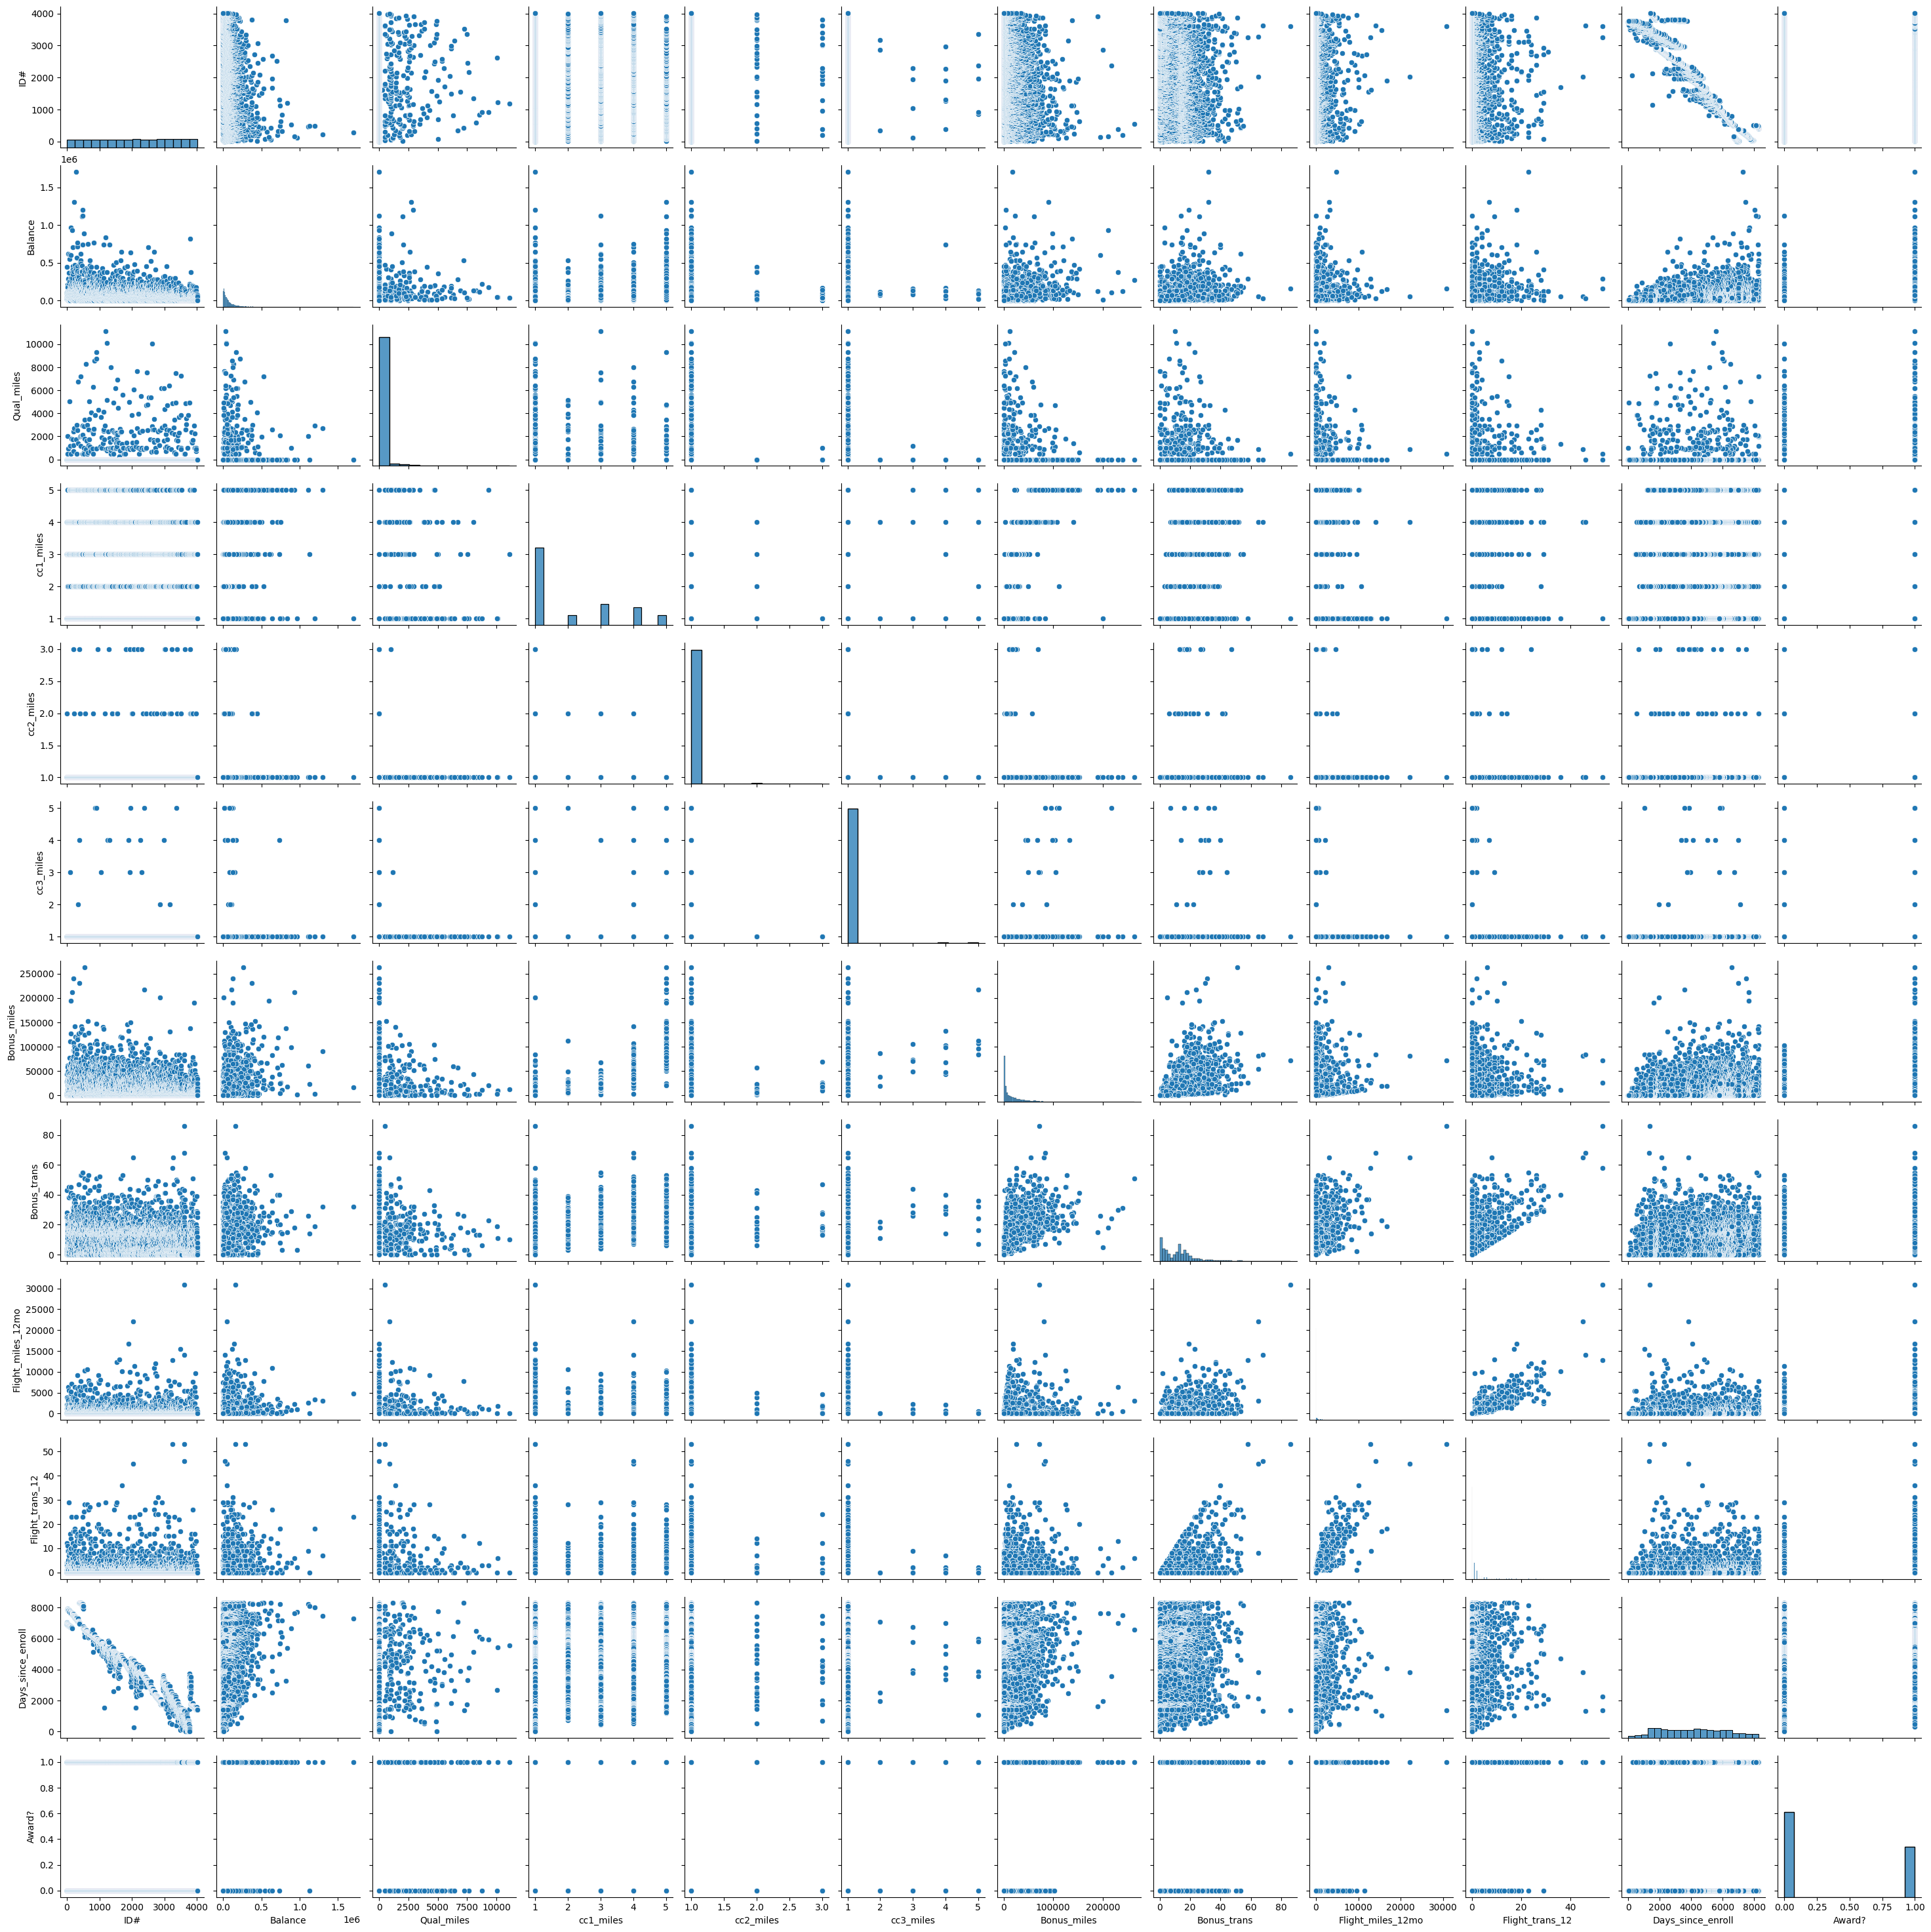

In [ ]:
#scatter plots
import seaborn as sns
sns.pairplot(df)

#Data Preprocessing

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
# df_scaled

#Implementing Clustering Algorithms

In [ ]:
#DBSCAN clustering
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5,min_samples=5)
df["dbscan"] = dbscan.fit_predict(df_scaled)

from sklearn.metrics import silhouette_score
dbscan_score=silhouette_score(df_scaled,df["dbscan"])
print("DBSCAN Score:",np.round(dbscan_score,2))

DBSCAN Score: 0.51


In [ ]:
df["dbscan"].value_counts()

,count
dbscan,
0,3930
2,27
-1,23
1,14
3,5


In [ ]:
df_new=df[df["dbscan"]!=-1]
df_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
#DBSCAN clustering on the filtered data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_new_scaled=scaler.fit_transform(df_new.drop("dbscan",axis=1)) # Scale df_new

dbscan=DBSCAN(eps=3,min_samples=3)
df_new["dbscan_new"] = dbscan.fit_predict(df_new_scaled) # Apply clustering to df_new

from sklearn.metrics import silhouette_score
dbscan_score=silhouette_score(df_new_scaled,df_new["dbscan_new"])
print("DBSCAN_new Score:",np.round(dbscan_score,2))

/tmp/ipython-input-2692326395.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["dbscan_new"] = dbscan.fit_predict(df_new_scaled) # Apply clustering to df_new


DBSCAN_new Score: 0.52


In [ ]:
#agglomerative
#single
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
single=AgglomerativeClustering(n_clusters=5,linkage="single")

df_new["Single"]=single.fit_predict(df_new_scaled)

single_score=silhouette_score(df_new_scaled,df_new["Single"])
print("Single Score:",np.round(single_score,2))

/tmp/ipython-input-3570900743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Single"]=single.fit_predict(df_new_scaled)


Single Score: 0.51


In [ ]:
#complete
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
complete=AgglomerativeClustering(n_clusters=5,linkage="complete")

df_new["Complete"]=complete.fit_predict(df_new_scaled)

complete_score=silhouette_score(df_new_scaled,df_new["Complete"])
print("Complete Score:",np.round(complete_score,2))

/tmp/ipython-input-1320439625.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Complete"]=complete.fit_predict(df_new_scaled)


Complete Score: 0.56


In [ ]:
#average
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
average=AgglomerativeClustering(n_clusters=5,linkage="average")

df_new["Average"]=average.fit_predict(df_new_scaled)

average_score=silhouette_score(df_new_scaled,df_new["Average"])
print("Average Score:",np.round(average_score,2))

/tmp/ipython-input-2410746901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Average"]=average.fit_predict(df_new_scaled)


Average Score: 0.62


In [ ]:
#ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
ward=AgglomerativeClustering(n_clusters=5,linkage="ward")

df_new["Ward"]=ward.fit_predict(df_new_scaled)

ward_score=silhouette_score(df_new_scaled,df_new["Ward"])
print("Ward Score:",np.round(ward_score,2))

/tmp/ipython-input-2318682648.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Ward"]=ward.fit_predict(df_new_scaled)


Ward Score: 0.15


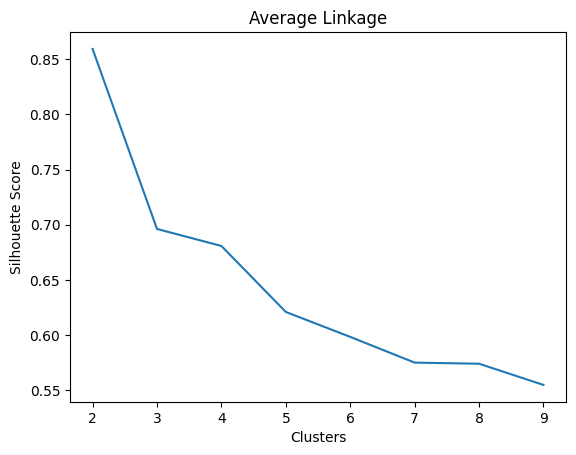

In [ ]:
scores=[]
for i in range(2,10):
  average=AgglomerativeClustering(n_clusters=i,linkage="average")
  average_score=silhouette_score(df_new_scaled,average.fit_predict(df_new_scaled))
  scores.append(average_score)

import matplotlib.pyplot as plt
plt.plot(range(2,10),scores)
plt.title("Average Linkage")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [ ]:
#k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans=KMeans(n_clusters=5)
df_new["Kmeans"]=kmeans.fit_predict(df_new_scaled)

kmeans_score=silhouette_score(df_new_scaled,df_new["Kmeans"])
print("Kmeans Score:",np.round(kmeans_score,2))

/tmp/ipython-input-3524610303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Kmeans"]=kmeans.fit_predict(df_new_scaled)


Kmeans Score: 0.23


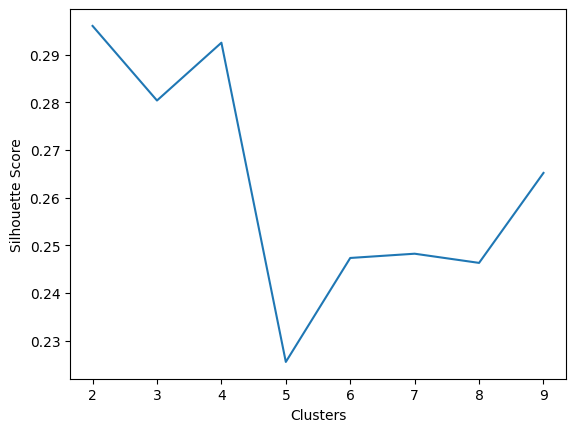

In [ ]:
scores=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i)
  kmeans_score=silhouette_score(df_new_scaled,kmeans.fit_predict(df_new_scaled))
  scores.append(kmeans_score)

import matplotlib.pyplot as plt
plt.plot(range(2,10),scores)
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.show()

#Visualization

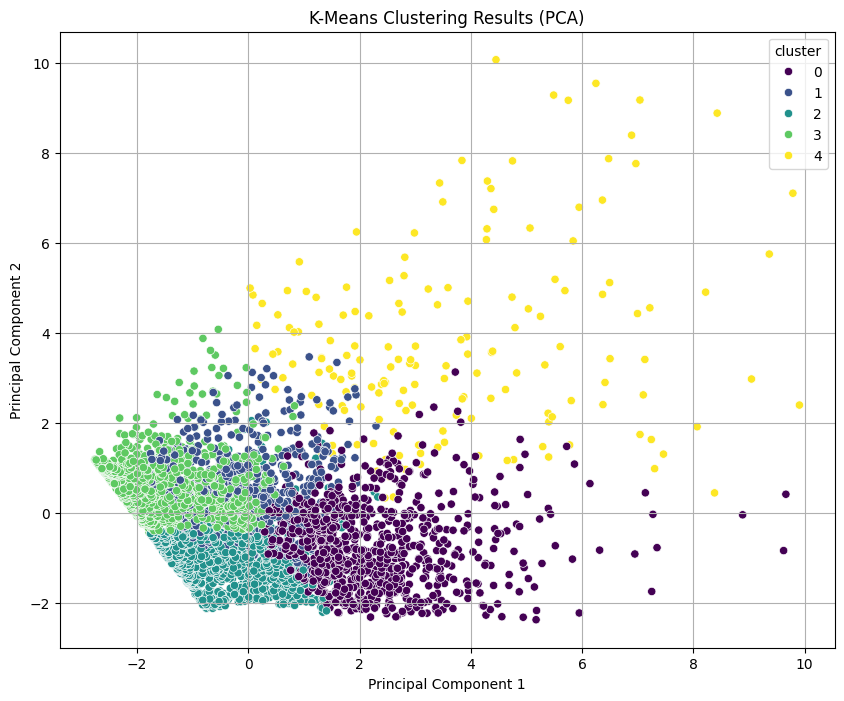

In [ ]:
# Visualize K-Means clusters using PCA
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_new_scaled)
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

# Add the cluster labels to the PCA DataFrame
pca_df['cluster'] = df_new['Kmeans'].reset_index(drop=True)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='cluster', data=pca_df, palette='viridis', legend='full')
plt.title('K-Means Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#Clustering Analysis and Interpretation

In [ ]:
# Analyze cluster characteristics for DBSCAN on filtered data
if "dbscan_new" in df_new.columns and len(df_new["dbscan_new"].unique()) > 1:
    dbscan_new_characteristics = df_new[df_new["dbscan_new"] != -1].groupby('dbscan_new').mean()
    print("\nDBSCAN (filtered data) Cluster Characteristics:")
    display(dbscan_new_characteristics)
else:
    print("\nDBSCAN (filtered data) did not form multiple clusters (excluding noise) or column not found.")

# Analyze cluster characteristics for Agglomerative Single Linkage
if "Single" in df_new.columns and len(df_new["Single"].unique()) > 1:
    single_characteristics = df_new.groupby('Single').mean()
    print("\nAgglomerative (Single Linkage) Cluster Characteristics:")
    display(single_characteristics)
else:
     print("\nAgglomerative (Single Linkage) did not form multiple clusters or column not found.")


# Analyze cluster characteristics for Agglomerative Complete Linkage
if "Complete" in df_new.columns and len(df_new["Complete"].unique()) > 1:
    complete_characteristics = df_new.groupby('Complete').mean()
    print("\nAgglomerative (Complete Linkage) Cluster Characteristics:")
    display(complete_characteristics)
else:
    print("\nAgglomerative (Complete Linkage) did not form multiple clusters or column not found.")

# Analyze cluster characteristics for Agglomerative Average Linkage
if "Average" in df_new.columns and len(df_new["Average"].unique()) > 1:
    average_characteristics = df_new.groupby('Average').mean()
    print("\nAgglomerative (Average Linkage) Cluster Characteristics:")
    display(average_characteristics)
else:
    print("\nAgglomerative (Average Linkage) did not form multiple clusters or column not found.")

# Analyze cluster characteristics for Agglomerative Ward Linkage
if "Ward" in df_new.columns and len(df_new["Ward"].unique()) > 1:
    ward_characteristics = df_new.groupby('Ward').mean()
    print("\nAgglomerative (Ward Linkage) Cluster Characteristics:")
    display(ward_characteristics)
else:
    print("\nAgglomerative (Ward Linkage) did not form multiple clusters or column not found.")


DBSCAN (filtered data) Cluster Characteristics:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbscan,Single,Complete,Average,Ward,Kmeans
dbscan_new,,,,,,,,,,,,,,,,,,
0,2021.277149,69862.606279,122.518271,2.052496,1.0,1.0,16186.565363,11.200463,373.522903,1.149768,4102.201750,0.362584,0.0,0.0,0.030108,0.0,0.427946,1.813176
1,2154.214286,45781.714286,0.000000,1.000000,3.0,1.0,20147.571429,16.928571,410.000000,1.714286,4137.642857,0.357143,1.0,2.0,4.000000,0.0,4.000000,2.285714
2,2400.600000,39187.040000,0.000000,1.120000,2.0,1.0,11107.040000,14.840000,224.000000,0.800000,3703.240000,0.320000,2.0,1.0,4.000000,0.0,4.000000,2.040000
3,1757.400000,102022.600000,0.000000,3.600000,1.0,4.0,90060.800000,27.000000,210.000000,0.600000,4730.200000,0.400000,3.0,3.0,3.000000,3.0,3.000000,0.000000



Agglomerative (Single Linkage) Cluster Characteristics:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbscan,dbscan_new,Complete,Average,Ward,Kmeans
Single,,,,,,,,,,,,,,,,,,
0,2013.282188,72346.370738,142.551654,2.063104,1.0,1.0,16786.103053,11.393130,432.775064,1.299237,4118.142239,0.368193,0.0,-0.011196,0.038677,0.006107,0.434351,1.827481
1,2330.115385,52331.000000,0.000000,1.153846,2.0,1.0,11544.653846,15.230769,223.576923,0.807692,3812.307692,0.346154,2.0,1.884615,4.000000,0.000000,4.000000,1.961538
2,2154.214286,45781.714286,0.000000,1.000000,3.0,1.0,20147.571429,16.928571,410.000000,1.714286,4137.642857,0.357143,1.0,1.000000,4.000000,0.000000,4.000000,2.285714
3,1757.400000,102022.600000,0.000000,3.600000,1.0,4.0,90060.800000,27.000000,210.000000,0.600000,4730.200000,0.400000,3.0,3.000000,3.000000,3.000000,3.000000,0.000000
4,9.000000,443003.000000,0.000000,3.000000,2.0,1.0,1753.000000,43.000000,3850.000000,12.000000,6948.000000,1.000000,2.0,-1.000000,4.000000,0.000000,0.000000,4.000000



Agglomerative (Complete Linkage) Cluster Characteristics:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbscan,dbscan_new,Single,Average,Ward,Kmeans
Complete,,,,,,,,,,,,,,,,,,
0,2014.882706,71174.082027,64.938088,2.057994,1.000000,1.0,16481.695141,11.112069,329.418234,1.018548,4116.975444,0.361024,0.000000,-0.004180,0.000000,0.003135,0.418757,1.797806
1,1780.807692,133086.461538,437.788462,2.403846,1.000000,1.0,37052.461538,31.730769,7743.980769,20.980769,4509.903846,0.807692,0.000000,-0.403846,0.000000,0.230769,2.000000,4.000000
2,2132.520000,98927.100000,5777.600000,2.100000,1.000000,1.0,19014.560000,11.760000,742.120000,2.320000,3800.040000,0.460000,0.000000,-0.140000,0.000000,0.000000,0.000000,1.840000
3,1757.400000,102022.600000,0.000000,3.600000,1.000000,4.0,90060.800000,27.000000,210.000000,0.600000,4730.200000,0.400000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
4,2213.439024,59623.243902,0.000000,1.146341,2.341463,1.0,14243.414634,16.487805,375.682927,1.390244,3999.878049,0.365854,1.658537,1.512195,1.414634,0.000000,3.902439,2.121951



Agglomerative (Average Linkage) Cluster Characteristics:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbscan,dbscan_new,Single,Complete,Ward,Kmeans
Average,,,,,,,,,,,,,,,,,,
0,2017.730925,7.103400e+04,140.148055,2.049015,1.013896,1.0,16355.236483,11.402981,415.941385,1.271349,4112.104346,0.366094,0.01718,0.007832,0.014654,0.07908,0.470187,1.829459
1,1101.125000,3.563050e+05,73.500000,4.500000,1.000000,1.0,210607.500000,27.125000,2352.125000,7.500000,5796.125000,1.000000,0.00000,-1.000000,0.000000,0.00000,0.000000,1.000000
2,483.000000,1.156307e+06,2467.000000,3.000000,1.000000,1.0,32341.500000,22.500000,2950.000000,13.500000,8125.500000,1.000000,0.00000,-1.000000,0.000000,0.00000,0.000000,4.000000
3,1757.400000,1.020226e+05,0.000000,3.600000,1.000000,4.0,90060.800000,27.000000,210.000000,0.600000,4730.200000,0.400000,3.00000,3.000000,3.000000,3.00000,3.000000,0.000000
4,2332.000000,1.500600e+05,0.000000,1.000000,1.000000,1.0,23265.333333,18.666667,15065.333333,14.666667,3321.666667,1.000000,0.00000,-1.000000,0.000000,1.00000,2.000000,4.000000



Agglomerative (Ward Linkage) Cluster Characteristics:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbscan,dbscan_new,Single,Complete,Average,Kmeans
Ward,,,,,,,,,,,,,,,,,,
0,1590.846656,91442.586868,203.274062,2.570147,1.000408,1.0,23253.014274,13.223899,251.155383,0.805057,4874.465334,0.516721,0.000816,-0.009380,0.001631,0.042414,0.004894,1.254078
1,2809.240608,32070.575540,12.045564,1.079137,1.000000,1.0,2958.043965,5.976819,147.977618,0.457234,2681.992006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.768985
2,2180.228070,89590.907895,204.960526,2.013158,1.000000,1.0,23044.885965,21.561404,3963.609649,11.280702,3876.692982,0.793860,0.000000,-0.096491,0.000000,0.228070,0.052632,2.837719
3,1757.400000,102022.600000,0.000000,3.600000,1.000000,4.0,90060.800000,27.000000,210.000000,0.600000,4730.200000,0.400000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
4,2268.550000,50038.750000,0.000000,1.100000,2.350000,1.0,14555.675000,15.825000,288.825000,1.125000,3926.175000,0.350000,1.650000,1.575000,1.350000,4.000000,0.000000,2.075000


In [ ]:
# Analyze cluster characteristics
# Assuming 'Kmeans' is the column with cluster labels in df_new
cluster_characteristics = df_new.groupby('Kmeans').mean()
display(cluster_characteristics)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbscan,dbscan_new,Single,Complete,Average,Ward
Kmeans,,,,,,,,,,,,,,,,,,
0,1319.016311,145322.243413,140.811794,4.148055,1.002509,1.018821,50007.212045,19.716437,354.233375,1.077792,5355.441656,0.637390,0.023839,0.008783,0.021330,0.058971,0.026349,0.061481
1,2508.085496,49450.019847,201.839695,1.909924,1.018321,1.000000,13165.610687,11.587786,365.090076,1.135878,3282.064122,1.000000,0.022901,0.021374,0.018321,0.085496,0.000000,0.253435
2,1029.587400,57275.396628,77.956522,1.395741,1.016859,1.000000,5745.745342,7.878438,183.299024,0.575865,5834.896185,0.148181,0.020408,0.020408,0.016859,0.063886,0.000000,0.308784
3,3151.117264,38339.297231,91.610749,1.363192,1.015472,1.000000,5685.456026,7.434039,139.568404,0.403909,2101.009772,0.000000,0.018730,0.017915,0.015472,0.068404,0.000000,0.853420
4,1702.769231,162333.035503,683.082840,2.183432,1.017751,1.000000,29983.733728,25.289941,4839.248521,14.307692,4721.526627,0.792899,0.017751,-0.195266,0.035503,0.426036,0.106509,1.603550
